In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # required even though not ref'd!
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import glob
import os
from PIL import Image as PIL_Image

%config InlineBackend.figure_format = 'svg'

In [2]:
def loss(B,X,y):
    "Line coefficients: B = [y-intercept, slope]"
    cost = 0.0
    B = np.array(B)
    n = len(X)
    return np.sum(y - np.dot(X,B))**2 / n

In [3]:
def get_surface(X, y, loss, b0_range, b1_range):
    n = len(X)
    B0 = np.ones(shape=(n, 1))
    X = np.hstack([np.ones(shape=(n, 1)), X]) # add ones column
    (b0_mesh, b1_mesh) = np.meshgrid(b0_range, b1_range, indexing='ij')
    L = np.zeros(b0_mesh.shape)

    for i in range(len(b0_range)):
        for j in range(len(b1_range)):
            L[i][j] = loss([b0_range[i],b1_range[j]], X=X, y=y)
    return L

In [74]:
def plot3d(L, b0_range, b1_range, elev=50, azim=145):
    rcParams["font.size"] = 10
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev, azim)
    b0_range_mesh, b1_range_mesh = np.meshgrid(b0_range, b1_range, indexing='ij')
    surface = ax.plot_surface(b0_range_mesh, b1_range_mesh, L, alpha=0.6, cmap='coolwarm')
    
    plt.title("""$loss(\\beta) = \sum_{i=1}^{N}(y^{{(i)}} - (\\beta_0 + \\beta_1 x^{{(i)}}))^2$""", fontsize=14)
    ax.set_xlabel('$\\beta_0$', fontsize=14)
    ax.set_ylabel('$\\beta_1$', fontsize=14)
    ax.zaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))

In [5]:
df = pd.read_csv('cheese_deaths.csv')
df

,years,cheese,deaths
0,2000,29.8,327
1,2001,30.1,456
2,2002,30.5,509
3,2003,30.6,497
4,2004,31.3,596
5,2005,31.7,573
6,2006,32.6,661
7,2007,32.7,809
8,2008,32.8,717
9,2009,33.1,741


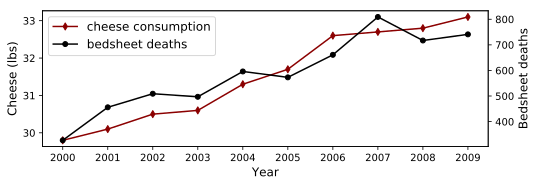

In [6]:
fig, ax1 = plt.subplots(figsize=(8,2.5))
ax1.set_xticks(df.years)
p1, = ax1.plot(df.years, df.cheese, 'darkred', marker='d', markersize=5)
ax2 = ax1.twinx()
p2, = ax2.plot(df.years, df.deaths, 'k', marker='o', markersize=5)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Cheese (lbs)", fontsize=12)
ax2.set_ylabel("Bedsheet deaths", fontsize=12)

ax1.legend(handles=[p1, p2], labels=['cheese consumption','bedsheet deaths'], fontsize=12)
plt.show()

In [7]:
X, y = df.cheese.values, df.deaths.values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [8]:
lm = LinearRegression()
lm.fit(X, y)
print(f"True b0 = {lm.intercept_[0]:.2f}, b1 = {lm.coef_[0][0]:.1f}")

True b0 = -2977.35, b1 = 113.1


In [72]:
b0_range = np.arange(-3500, -2500, 30)  # y intercept
b1_range = np.arange(95, 130, 1)        # slope
L = get_surface(X, y, loss, b0_range=b0_range, b1_range=b1_range)

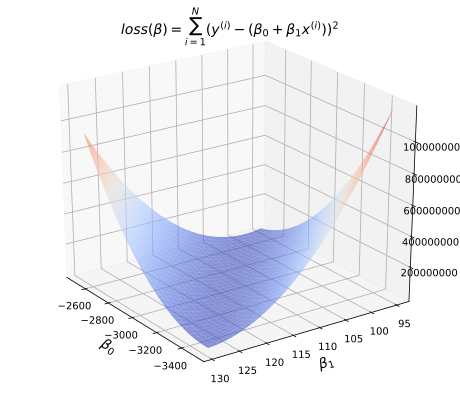

In [75]:
plot3d(L, b0_range=b0_range, b1_range=b1_range, elev=25)

In [57]:
n = 10
elev_range = np.arange(40, -40, -1)
azim_range = np.arange(0, 25, 1)

In [59]:
i = 0
for e,a in zip(elev_range,azim_range):
    print(e,a)
    plot3d(L, b0_range=b0_range, b1_range=b1_range, azim=a, elev=e)
    plt.savefig(f"/tmp/cheese-frame-{i:02d}.png", bbox_inches=0, pad_inches=0, dpi=300)
    plt.close()
    i += 1

40 0
39 1
38 2
37 3
36 4
35 5
34 6
33 7
32 8
31 9
30 10
29 11
28 12
27 13
26 14
25 15
24 16
23 17
22 18
21 19
20 20
19 21
18 22
17 23
16 24


In [55]:
images = [PIL_Image.open(image) for image in sorted(glob.glob(f'/tmp/cheese-frame-*.png'))]
images += reversed(images)
images[0].save(f'/tmp/cheese-animation.gif',
               save_all=True,
               append_images=images[1:],
               duration=80,
               loop=0)